In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = models.Sequential([
    layers.Dense(32, input_shape=(784,)),
    layers.Activation('relu'),
    layers.Dense(10),
    layers.Activation('softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = models.Sequential()
model.add(layers.Dense(32, input_dim=784))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, input_dim=784))
model.add(layers.Activation('relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


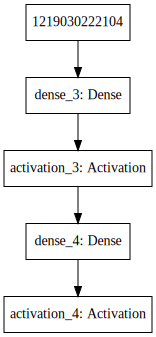

In [16]:
#Visualization https://keras.io/visualization/
#needs https://graphviz.gitlab.io/download/ and !conda install pydot graphviz -y
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot #note: bug in the docs!
from keras.utils import plot_model
#exports it to a file
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [4]:
help(models.Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.compile(optimizer=optimizer, los

In [12]:
help(models.Sequential.compile)

Help on function compile in module keras.engine.training:

compile(self, optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)
    Configures the model for training.
    
    # Arguments
        optimizer: String (name of optimizer) or optimizer instance.
            See [optimizers](/optimizers).
        loss: String (name of objective function) or objective function.
            See [losses](/losses).
            If the model has multiple outputs, you can use a different loss
            on each output by passing a dictionary or a list of losses.
            The loss value that will be minimized by the model
            will then be the sum of all individual losses.
        metrics: List of metrics to be evaluated by the model
            during training and testing.
            Typically you will use `metrics=['accuracy']`.
            To specify different metrics for different outputs of a
            m

In [13]:
help(models.Sequential.fit)

Help on function fit in module keras.engine.training:

fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs)
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has multiple outputs).
            If output layer

In [14]:
help(models.Sequential.evaluate)

Help on function evaluate in module keras.engine.training:

evaluate(self, x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None)
    Returns the loss value & metrics values for the model in test mode.
    
    Computation is done in batches.
    
    # Arguments
        x: Numpy array of test data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has multiple outputs).
            If output layers in the model are named, you can also pass a
            dictionary mapping output names to Numpy arrays.
            `y

In [6]:
help(layers.core)

Help on module keras.layers.core in keras.layers:

NAME
    keras.layers.core - Core Keras layers.

CLASSES
    keras.engine.base_layer.Layer(builtins.object)
        Activation
        ActivityRegularization
        Dense
        Dropout
            SpatialDropout1D
            SpatialDropout2D
            SpatialDropout3D
        Flatten
        Lambda
        Masking
        Permute
        RepeatVector
        Reshape
    
    class Activation(keras.engine.base_layer.Layer)
     |  Applies an activation function to an output.
     |  
     |  # Arguments
     |      activation: name of activation function to use
     |          (see: [activations](../activations.md)),
     |          or alternatively, a Theano or TensorFlow operation.
     |  
     |  # Input shape
     |      Arbitrary. Use the keyword argument `input_shape`
     |      (tuple of integers, does not include the samples axis)
     |      when using this layer as the first layer in a model.
     |  
     |  # Output 

In [7]:
help(layers.core.Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  # Example
 |  
 |  ```python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 |      model.add(Dense(32, input_shape=(16,)))
 |      # now the model will take as input arrays of shape (*, 16)
 |      # and output arrays of shape (*, 32)
 |  
 |      # after the first layer, you don't need to specify
 |      # the size of the 

In [15]:
# Custom metrics
# import keras.backend as K

# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy', mean_pred])
help(keras.metrics)

Help on module keras.metrics in keras:

NAME
    keras.metrics - Built-in metrics.

FUNCTIONS
    binary_accuracy(y_true, y_pred)
    
    categorical_accuracy(y_true, y_pred)
    
    deserialize(config, custom_objects=None)
    
    get(identifier)
    
    serialize(metric)
    
    sparse_categorical_accuracy(y_true, y_pred)
    
    sparse_top_k_categorical_accuracy(y_true, y_pred, k=5)
    
    top_k_categorical_accuracy(y_true, y_pred, k=5)

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    c:\programdata\anaconda3\envs\dltf36\lib\site-packages\keras\metrics.py




In [ ]:
#Callback example
#Metrics (F1 score)
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    
def on_train_begin(self, logs={}):
 self.val_f1s = []
 self.val_recalls = []
 self.val_precisions = []
 
def on_epoch_end(self, epoch, logs={}):
 val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
 val_targ = self.model.validation_data[1]
 _val_f1 = f1_score(val_targ, val_predict)
 _val_recall = recall_score(val_targ, val_predict)
 _val_precision = precision_score(val_targ, val_predict)
 self.val_f1s.append(_val_f1)
 self.val_recalls.append(_val_recall)
 self.val_precisions.append(_val_precision)
 print “ — val_f1: %f — val_precision: %f — val_recall %f” %(_val_f1, _val_precision, _val_recall)
 return
 
metrics = Metrics()

#on_train_begin is initialized at the beginning of the training. Here we initiate 3 lists to hold the values of the interested quantities, which are computed in on_epoch_end
#print (metrics.val_f1s)
#usage: 
# model.fit(training_data, training_target, 
#  validation_data=(validation_data, validation_target),
#  nb_epoch=10,
#  batch_size=64,
#  callbacks=[metrics])